# Decision Trees
## We can only use numpy and panads

Q3. Implement a Decision Tree Classifier in Python without using sklearn.tree.
[3]
You are allowed to use the following libraries:
• numpy for numerical computations
• pandas for data handling
Your implementation should support:
1. Binary Splitting: The tree should split data based on the feature and
threshold that minimize impurity.
2. Impurity Metrics: Implement Gini Impurity.
3. Recursive Tree Construction: Implement a recursive function to build
the tree.
4. Prediction: Implement a function to classify new data points using the
trained tree.
5. Stopping Conditions: Include stopping criteria based on:
• Maximum depth of the tree.
• Minimum number of samples per leaf node.

In [19]:
%pip install numpy
%pip install pandas

1479.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1485.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd

High - 2
Medium - 1
Low - 0

No - 0
Yes - 1

Fair - 0
Excellent - 1

In [21]:
sample_table = [[25,2,0,0,0],[30,2,0,1,0],[35,1,0, 0,1],[40,0,0,0,1],[45,0,0,0,1],[50,0,1,1,0],[55,1,1,1,1],[60,2,0,0,0]]
sample_table_coloumns = ["Age", "Income", "Student", "Credit Rating", "Buy Computer"]
df = pd.DataFrame.from_records(sample_table, columns=sample_table_coloumns)

In [22]:
print(df)

   Age  Income  Student  Credit Rating  Buy Computer
0   25       2        0              0             0
1   30       2        0              1             0
2   35       1        0              0             1
3   40       0        0              0             1
4   45       0        0              0             1
5   50       0        1              1             0
6   55       1        1              1             1
7   60       2        0              0             0


In [ ]:
def calculate_gini(p_class):
    return 2*(1-p_class)*(p_class)

def weight_gini_impurity(left, right, target_col):
    number_left = len(left)
    number_right = len(right)
    total = number_left + number_right

    p_left = 0
    p_right = 0
    if number_left > 0:
        p_left = left[target_col].mean()
    if number_right > 0:
        p_right = right[target_col].mean() 

    # Calculate the binary Gini impurity using 2 * p * (1-p)
    gini_left = 2 * p_left * (1 - p_left)
    gini_right = 2 * p_right * (1 - p_right)

    return (number_left / total) * gini_left + (number_right / total) * gini_right

income_label = [0.5,1.5]
student_status_label = [0.5]
credit_status = [0.5]
age_status = [27.5,32.5,37.5,42.5,47.5,52.5,57.5]

feature_array = [age_status, income_label, student_status_label, credit_status]
input_columns = sample_table_coloumns[:-1]
best_gini = float('inf')
best_feature = None
best_split = None

# Calculating the best split, < and >=
for idx in range(len(input_columns)):
    col_name = input_columns[idx]
    # Get candidate thresholds for this feature
    candidate_thresholds = feature_array[idx]
    for threshold in candidate_thresholds:
        left_split = df[df[col_name] < threshold]
        right_split = df[df[col_name] >= threshold]
        gini_impurity = weight_gini_impurity(left_split, right_split, sample_table_coloumns[-1])
        if gini_impurity < best_gini:
            best_gini = gini_impurity
            best_feature = col_name
            best_split = threshold

print("Best Gini impurity:", best_gini)
print("Best feature:", best_feature)
print("Best split threshold:", best_split)



Best Gini impurity: 0.19999999999999996
Best feature: Income
Best split threshold: 1.5


In [24]:
def build_tree(df, depth, max_depth, min_samples, input_columns, feature_array, target_col):
    # Stopping conditions:
    #   1. Maximum depth reached
    #   2. Too few samples to split further
    #   3. Node is pure (all target values the same)
    if depth >= max_depth or len(df) < min_samples or df[target_col].nunique() == 1:
        # Create a leaf node with the majority class prediction
        prediction = df[target_col].mode()[0]
        return {"type": "leaf", "prediction": prediction}
    
    best_gini = float('inf')
    best_feature = None
    best_split = None
    best_left = None
    best_right = None
    
    for idx in range(len(input_columns)):
        col_name = input_columns[idx]
        candidate_thresholds = feature_array[idx]  # Candidate thresholds for this feature
        for threshold in candidate_thresholds:
            left_split = df[df[col_name] < threshold]
            right_split = df[df[col_name] >= threshold]
            
            if len(left_split) == 0 or len(right_split) == 0:
                continue
            
            gini_impurity = weight_gini_impurity(left_split, right_split, target_col)
            if gini_impurity < best_gini:
                best_gini = gini_impurity
                best_feature = col_name
                best_split = threshold
                best_left = left_split
                best_right = right_split

    if best_feature is None:
        prediction = df[target_col].mode()[0]
        return {"type": "leaf", "prediction": prediction}

    # Recursively build the left and right subtrees.
    left_subtree = build_tree(best_left, depth + 1, max_depth, min_samples, input_columns, feature_array, target_col)
    right_subtree = build_tree(best_right, depth + 1, max_depth, min_samples, input_columns, feature_array, target_col)
    
    return {
        "type": "node",
        "feature": best_feature,
        "threshold": best_split,
        "left": left_subtree,
        "right": right_subtree
    }

max_depth  = 3
min_samples = 2

tree = build_tree(df, depth=0, max_depth=max_depth, min_samples=min_samples, 
                  input_columns=input_columns, feature_array=feature_array, 
                  target_col=sample_table_coloumns[-1])

def print_tree(node, indent=""):
    """
    Recursively print the decision tree in a friendly format.
    
    Parameters:
        node (dict): A node in the decision tree.
        indent (str): Indentation string for current depth level.
    """
    if node["type"] == "leaf":
        print(indent + "Leaf: Predict =", node["prediction"])
    else:
        print(indent + f"Node: if {node['feature']} < {node['threshold']}")
        print(indent + "  Left:")
        print_tree(node["left"], indent + "    ")
        print(indent + "  Right:")
        print_tree(node["right"], indent + "    ")

# Example usage:
print("Decision Tree Structure:")
print_tree(tree)


Decision Tree Structure:
Node: if Income < 1.5
  Left:
    Node: if Age < 47.5
      Left:
        Leaf: Predict = 1
      Right:
        Node: if Age < 52.5
          Left:
            Leaf: Predict = 0
          Right:
            Leaf: Predict = 1
  Right:
    Leaf: Predict = 0


In [25]:
def predict(tree, sample):
    if tree["type"] == "leaf":
        return tree["prediction"]
    else:
        feature = tree["feature"]
        threshold = tree["threshold"]
        if sample[feature] < threshold:
            return predict(tree["left"], sample)
        else:
            return predict(tree["right"], sample)

test_sample = {"Age": 42, "Income": 1, "Student": 0, "Credit Rating": 1}
print("Predicted class:", predict(tree, test_sample))

Predicted class: 1


Q4 For the data given in Q3,
<br>
• Improve the performance by bagging 10 different trees. Compute the OOB
error. [2]

Tasks
1. Generate Data: 
<br>
• Sample 100 points x uniformly from the interval [0, 2π].
• Compute target values using the function:
y = sin(x) + , where  ∼ N (0, 0.1^2)

2. Consider models upto degree 4.
3. Perform 5-Fold Cross-Validation:
<br>
• Split the dataset into 5 folds.
• For each fold, train the model on 4 folds and test on the remaining
fold.
• Repeat the process to evaluate all 5 combinations.
• Use the above process to find the degree of the polynomial to be used.
4. Visualization:
<br>
• For the obtained degree
– Plot the true function y = sin(x).
– Plot the noisy training points.
– Plot the regression model’s prediction.

In [26]:
%pip install matplotlib

1491.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib.pyplot as plt

In [28]:
np.random.seed(70)  
num_samples = 100
x_values = np.random.uniform(0, 2 * np.pi, num_samples)
x_values = np.sort(x_values)  
noise = np.random.normal(0, 0.1, size=x_values.shape)
y_values = np.sin(x_values) + noise

# Reshape x to a column vector
X_matrix = x_values.reshape(-1, 1)
print(X_matrix)


[[0.03074638]
 [0.06473782]
 [0.14770825]
 [0.2039461 ]
 [0.27460439]
 [0.32786808]
 [0.43627787]
 [0.43959501]
 [0.50299339]
 [0.65626607]
 [0.68467879]
 [0.79134331]
 [0.82452525]
 [0.83804763]
 [0.89801374]
 [0.92996233]
 [0.94869949]
 [0.97461059]
 [1.16080599]
 [1.16307659]
 [1.17521562]
 [1.19829894]
 [1.24531094]
 [1.26315885]
 [1.32713173]
 [1.34199361]
 [1.38565329]
 [1.40001915]
 [1.45497706]
 [1.45853789]
 [1.64798317]
 [1.67653915]
 [1.7767236 ]
 [1.7984383 ]
 [1.85354834]
 [1.88402843]
 [1.92934417]
 [1.94785642]
 [1.99071776]
 [2.14472384]
 [2.16333487]
 [2.20612899]
 [2.28176812]
 [2.2984396 ]
 [2.29995909]
 [2.32762746]
 [2.40793652]
 [2.42561833]
 [2.61718007]
 [2.72502354]
 [2.77181096]
 [2.84322947]
 [2.84354157]
 [3.04035838]
 [3.06836595]
 [3.10088262]
 [3.10495889]
 [3.1436692 ]
 [3.32434579]
 [3.35955932]
 [3.39505044]
 [3.47128685]
 [3.64736157]
 [3.67334662]
 [3.71542574]
 [3.88701377]
 [4.09857822]
 [4.12984144]
 [4.21110082]
 [4.23934142]
 [4.44931374]
 [4.61

In [29]:
def create_polynomial_features(X, degree):
    num_samples = X.shape[0]
    X_poly = np.ones((num_samples, degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X[:, 0] ** d
    return X_poly

def fit_polynomial_regression(X_poly, y):
    X_transpose = X_poly.transpose()
    # Compute (X^T X)
    XtX = np.dot(X_transpose, X_poly)
    # (X^T X)
    XtX_inv = np.linalg.inv(XtX)
    #(X^T y)
    Xty = np.dot(X_transpose, y)
    # (X^T X)^(-1) (X^T y)
    theta = np.dot(XtX_inv, Xty)
    return theta

def predict_polynomial(X_poly, theta):
    return np.dot(X_poly, theta)

def calculate_mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def perform_cross_validation(X, y, degree, num_folds=5):
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)  # shuffle indices
    fold_sizes = (num_samples // num_folds) * np.ones(num_folds, dtype=int)
    fold_sizes[: num_samples % num_folds] += 1
    current = 0
    mse_scores = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate((indices[:start], indices[stop:]))
        current = stop
        
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        
        X_train_poly = create_polynomial_features(X_train, degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        theta = fit_polynomial_regression(X_train_poly, y_train)
        y_pred = predict_polynomial(X_test_poly, theta)
        mse_scores.append(calculate_mean_squared_error(y_test, y_pred))
    
    return np.mean(mse_scores)

Cross-Validation MSE for each degree:
Degree 1: MSE = 0.1971
Degree 2: MSE = 0.2180
Degree 3: MSE = 0.0182
Degree 4: MSE = 0.0185

Optimal polynomial degree chosen: 3

CV ERROR: [np.float64(0.19708589807768823), np.float64(0.2180066173323993), np.float64(0.0181605833688571), np.float64(0.01851446185795875)]


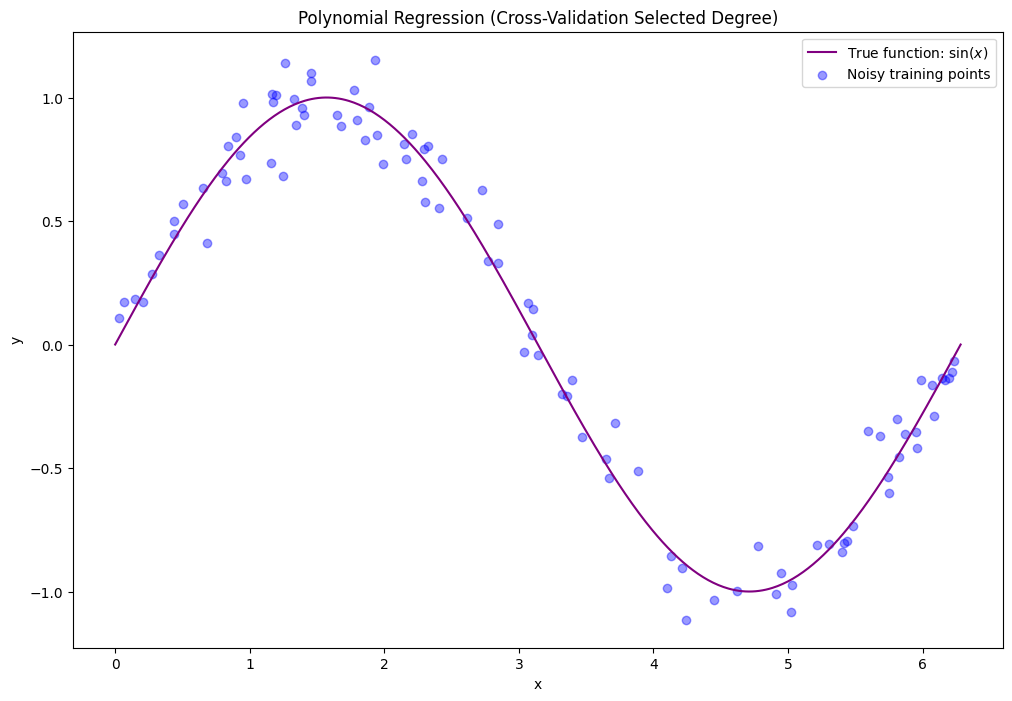

In [30]:
# Try polynomial degrees 1 through 4
degrees = [1, 2, 3, 4]
cv_errors = []

print("Cross-Validation MSE for each degree:")
for d in degrees:
    mse_cv = perform_cross_validation(X_matrix, y_values, degree=d, num_folds=5)
    cv_errors.append(mse_cv)
    print(f"Degree {d}: MSE = {mse_cv:.4f}")

optimal_degree = degrees[np.argmin(cv_errors)]
print("\nOptimal polynomial degree chosen:", optimal_degree)
print("\nCV ERROR:", cv_errors)

X_poly_final = create_polynomial_features(X_matrix, optimal_degree)
theta_final = fit_polynomial_regression(X_poly_final, y_values)

x_grid = np.linspace(0, 2 * np.pi, 500).reshape(-1, 1)
X_grid_poly = create_polynomial_features(x_grid, optimal_degree)

plt.figure(figsize=(12, 8))
plt.plot(x_grid, np.sin(x_grid), label=r"True function: $\sin(x)$", color="purple", linewidth=1.5)
plt.scatter(X_matrix, y_values, label="Noisy training points", color="blue", alpha=0.4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Cross-Validation Selected Degree)")
plt.legend()
plt.show()


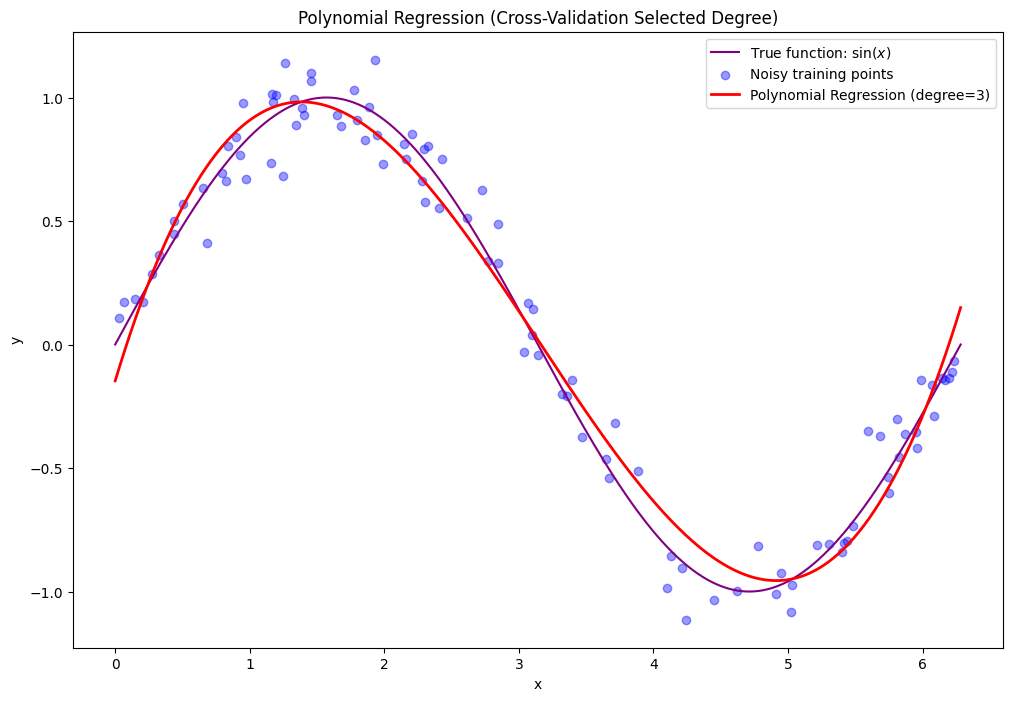

In [ ]:
y_pred_grid = predict_polynomial(X_grid_poly, theta_final)

plt.figure(figsize=(12, 8))
plt.plot(x_grid, np.sin(x_grid), label=r"True function: $\sin(x)$", color="purple", linewidth=1.5)
plt.scatter(X_matrix, y_values, label="Noisy training points", color="blue", alpha=0.4)
plt.plot(x_grid, y_pred_grid, label=f"Polynomial Regression (degree={optimal_degree})", color="red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Cross-Validation Selected Degree)")
plt.legend()
plt.show()